In [1]:

#Our journey from analysis to prediction includes:
#Understanding the data
#Data Preprocessing and Cleaning
#Exploratory data analysis (EDA)
#Data Modeling
#Model Evaluation
###Importing Libraries
#pandas: A library for data manipulation and analysis, offering powerful data structures like DataFrames for handling structured data efficiently.
#numpy: A library for numerical computing, providing support for arrays, matrices, and high-level mathematical operations.
#matplotlib.pyplot: A plotting library used for creating static, interactive, and animated visualizations.
#seaborn: A data visualization library built on top of Matplotlib, offering a high-level interface for creating attractive and informative statistical graphics.
#scipy.stats: A module within SciPy for performing statistical tests, probability distributions, and other statistical functions.
!pip install wordcloud


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing data 
data = pd.read_csv("/Users/sudheerpadmannagari/anaconda3/sentiment_tweets.csv", encoding="latin1", header=None)
data.shape
data.head()
columns = ["sentiment", "ids", "date", "flag", "user", "tweet"]
data.columns= columns
data.head()
data.info()
df = data[["tweet", "sentiment"]].copy()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [2]:
df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})
df.head()

,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudheerpadmannagari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


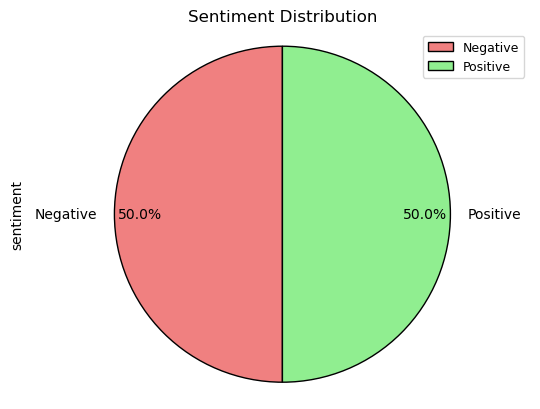

In [3]:
from wordcloud import WordCloud
nltk.download("stopwords")
stop_words = set(stopwords.words('english')) 
stop_words.update(["amp", "rt", "lt", "gt"])  

stemmer = PorterStemmer()  
def clean_tweet(tweet):
    tweet = tweet.lower()  
    tweet = re.sub(r"https?://\S+", "", tweet)  
    tweet = re.sub(r"@\w+|#", "", tweet)  
    tweet = re.sub(r"[^\w\s]|[\d]", "", tweet)  
    tweet = " ".join([stemmer.stem(word) for word in tweet.split() if word not in stop_words])
    return tweet

df["clean_tweet"] = df["tweet"].apply(clean_tweet)
df.head()

df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})
df.head()

df["sentiment"].value_counts().plot(kind="pie", 
                                    autopct='%1.1f%%',
                                    pctdistance=0.85, 
                                    startangle=90, 
                                    colors=["lightcoral", "lightgreen"],  
                                    wedgeprops={'edgecolor': 'black'}) 

plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.legend(labels=df["sentiment"].value_counts().index, 
           loc='upper right', fontsize=9)
plt.show()

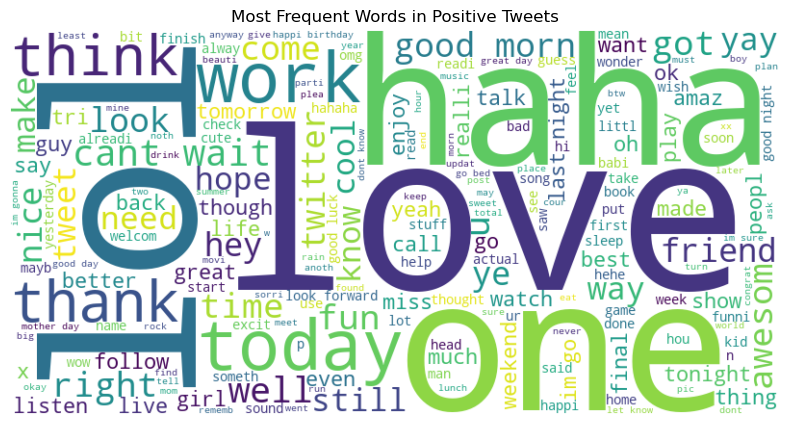

In [4]:
import matplotlib.pyplot as plt

positive_words = " ".join(df[df["sentiment"] == "Positive"]["clean_tweet"])
negative_words = " ".join(df[df["sentiment"] == "Negative"]["clean_tweet"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Positive Tweets")
plt.show()

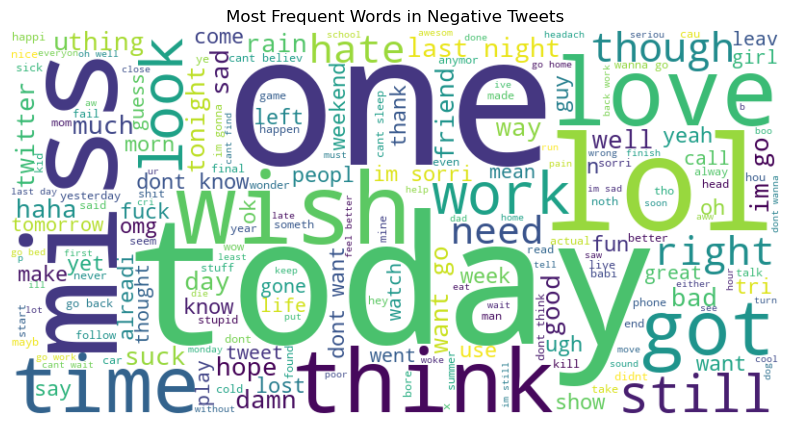

In [5]:

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Tweets")
plt.show()

In [6]:

df["tweet_length"] = df["clean_tweet"].apply(lambda x: len(x.split()))
df.head()

,tweet,sentiment,clean_tweet,tweet_length
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww that bummer shoulda got david carr third day,9
1,is upset that he can't update his Facebook by ...,Negative,upset cant updat facebook text might cri resul...,12
2,@Kenichan I dived many times for the ball. Man...,Negative,dive mani time ball manag save rest go bound,9
3,my whole body feels itchy and like its on fire,Negative,whole bodi feel itchi like fire,6
4,"@nationwideclass no, it's not behaving at all....",Negative,behav im mad cant see,5


In [7]:
zero_len = df[df["tweet_length"]==0][["tweet" ,"clean_tweet","tweet_length"]]
display(zero_len.shape)
zero_len.head()


(7090, 3)

,tweet,clean_tweet,tweet_length
208,@mandayyy,,0
249,@mandayyy,,0
282,@ITS_NEMESIS -------,,0
398,@danadearmond,,0
430,@anistorm,,0


In [8]:

df = df[df["tweet_length"] != 0].reset_index(drop = True)
df = df.drop_duplicates(subset=['clean_tweet'], keep='first')
display(df.shape)

(1475147, 4)

In [9]:

tweet_len = df.groupby(["sentiment"]).agg(
   mean = ("tweet_length", "mean")
)

tweet_len = tweet_len.transpose()
tweet_len

sentiment,Negative,Positive
mean,7.694833,7.345752


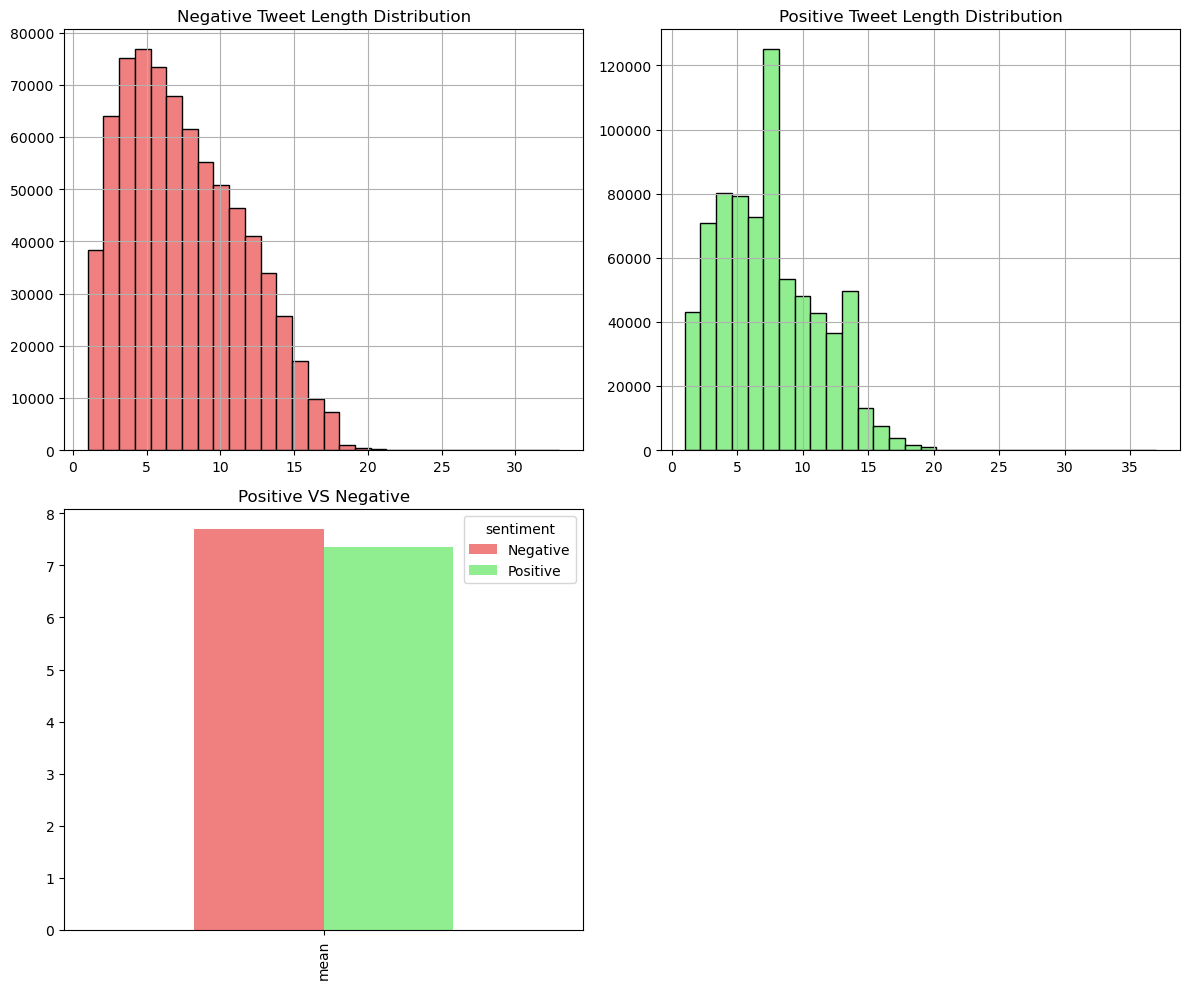

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


df[df["sentiment"]=="Negative"]["tweet_length"].hist(color="lightcoral", edgecolor="black", ax=axes[0, 0], bins=30)
df[df["sentiment"]=="Positive"]["tweet_length"].hist(color="lightgreen", edgecolor="black", ax=axes[0, 1], bins=30)
tweet_len.plot(kind="bar", color = ("lightcoral", "lightgreen"), ax = axes[1, 0] )

axes[0, 0].set_title("Negative Tweet Length Distribution")
axes[0, 1].set_title("Positive Tweet Length Distribution")
axes[1, 0].set_title("Positive VS Negative")
fig.delaxes(axes[1,1])

plt.tight_layout()
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=100000)
X = cv.fit_transform(df["clean_tweet"])
len(cv.get_feature_names_out())

100000

In [12]:
y = df["sentiment"].map({"Negative": 0, "Positive": 1}) 

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=500, solver='saga')
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=500, solver='saga')

In [15]:
y_pred = model.predict(x_test_scaled)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.4f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 75.5905%
Confusion Matrix:
[[141057  45112]
 [ 44907 137711]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    186169
           1       0.75      0.75      0.75    182618

    accuracy                           0.76    368787
   macro avg       0.76      0.76      0.76    368787
weighted avg       0.76      0.76      0.76    368787



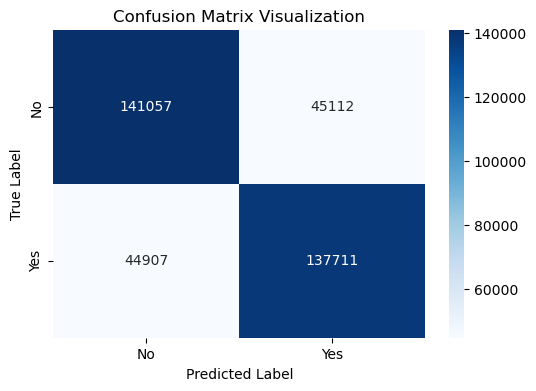

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Visualization")
plt.show()

In [18]:
sent = pd.DataFrame({"tweet": ["I am very happy today", "lol, i have depression"]})
sent["clean_tweet"] = sent["tweet"].apply(clean_tweet)
sent

,tweet,clean_tweet
0,I am very happy today,happi today
1,"lol, i have depression",lol depress


In [19]:

pre = cv.transform(sent["clean_tweet"])
pre = scaler.transform(pre)
predict_sent = model.predict(pre)
predict_sent

array([1, 0])